In [24]:
from imports import *
from priors import *
from periodogram import compute_LSperiodogram
from read_data import *
from rvmodel import get_rv1
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
# get MCMC results
samples = fits.open('output_data/3planets_TOI175_H164_HalphaGP_samplesv1')[0].data
results = get_results(samples)

In [3]:
# fix Ks
v = np.percentile(samples[:,8], (16,50,84))
results[:,8] = v[1], v[2]-v[1], v[1]-v[0]
v = np.percentile(samples[:,13], (16,50,84))
results[:,13] = v[1], v[2]-v[1], v[1]-v[0]
v = np.percentile(samples[:,18], (16,50,84))
results[:,18] = v[1], v[2]-v[1], v[1]-v[0]

In [4]:
# get data
fullRVs = True
bjd, rv, erv, program, bjdshort, fwhm, bis, Halpha, eHalpha, Hbeta, eHbeta, Hgamma, eHgamma, NaD, eNaD, Sindex, eSindex = read_HARPS(fullRVs)


# remove bad points known from loocv
badRVs = np.array([63])
g = np.delete(np.arange(bjd.size), badRVs)
#bjd, rv, erv, fwhm, bis, Halpha, eHalpha, Hbeta, eHbeta, Hgamma, eHgamma, NaD, eNaD, Sindex, eSindex = \
#bjd[g],rv[g],erv[g],fwhm[g],bis[g],Halpha[g],eHalpha[g],Hbeta[g],eHbeta[g],Hgamma[g],eHgamma[g],NaD[g],eNaD[g],Sindex[g],eSindex[g]
bjd, rv, erv, program = bjd[g],rv[g],erv[g], program[g]
Binds = program == 'Bonfils'
Jinds = program == 'Jenkins'
print bjd.size

-5660.691818181818
164


## corner plot

In [5]:
def get_xticks(j):
    if j == 0: # lna
        ticks = np.arange(0,6,1)
        ticklabels = np.array(['%i'%i for i in ticks])
        ticklabels[np.arange(1,6,2)] = ''
    elif j == 1: # lnl
        ticks = np.arange(0,13,2)
        ticklabels = np.array(['%i'%i for i in ticks])
        ticklabels[np.arange(1,7,2)] = ''
    elif j == 2: # lnG
        ticks = np.arange(-4,2,2)
        ticklabels = np.array(['%i'%i for i in ticks])
        #ticklabels[np.arange(1,,2)] = ''
    elif j == 3: # lnP
        ticks = np.arange(2,4.5,.5)
        ticklabels = np.array(['%i'%i for i in ticks])
        ticklabels[np.arange(1,5,2)] = ''
    elif j == 4: # s
        ticks = np.arange(0,1.2,.2)
        ticklabels = np.array(['%.1f'%i for i in ticks])
        ticklabels[np.arange(1,6,2)] = ''
    elif j == 5: # V
        ticks = np.arange(-2,3,2)
        ticklabels = np.array(['%i'%i for i in ticks])
        ticklabels[np.arange(1,3,2)] = ''
    elif j == 6: # Pb
        ticks = np.arange(2.252,2.2545,5e-4)
        ticklabels = np.array(['%.3f'%i for i in ticks])
        ticklabels[np.arange(1,6,2)] = ''
    elif j == 7: # T0-T0true
        ticks = np.arange(-4,5,2)*1e-4
        ticklabels = np.array(['%.4f'%i for i in ticks])
        ticklabels[np.arange(1,5,2)] = ''
    elif j == 8: # Kb
        ticks = np.arange(0,2.5,.5)
        ticklabels = np.array(['%i'%i for i in ticks])
        ticklabels[np.arange(1,5,2)] = ''
    elif j == 9: # hb
        ticks = np.arange(-1,1.5,.5)
        ticklabels = np.array(['%i'%i for i in ticks])
        ticklabels[np.arange(1,5,2)] = ''
    elif j == 10: # kb
        ticks = np.arange(-1,1.5,.5)
        ticklabels = np.array(['%i'%i for i in ticks])
        ticklabels[np.arange(1,5,2)] = ''
    elif j == 11: # Pc
        ticks = np.arange(3.6895,3.69151,5e-4)
        ticklabels = np.array(['%.4f'%i for i in ticks])
        ticklabels[np.arange(0,5,2)] = ''
    elif j == 12: # T0-T0true
        ticks = np.arange(-2,3.1,1)*1e-3
        ticklabels = np.array(['%.3f'%i for i in ticks])
        ticklabels[np.arange(1,6,2)] = ''
    elif j == 13: # Kc
        ticks = np.arange(1,3.6,1)
        ticklabels = np.array(['%i'%i for i in ticks])
        #ticklabels[np.arange(1,3,2)] = ''
    elif j == 14: # hc
        ticks = np.arange(-.5,.6,.25)
        ticklabels = np.array(['%.1f'%i for i in ticks])
        ticklabels[np.arange(1,5,2)] = ''
    elif j == 15: # kc
        ticks = np.arange(-.75,.8,.25)
        ticklabels = np.array(['%.1f'%i for i in ticks])
        ticklabels[np.arange(0,7,2)] = ''
    elif j == 16: # Pd
        ticks = np.arange(7.448,7.455,2e-3)
        ticklabels = np.array(['%.3f'%i for i in ticks])
        ticklabels[np.arange(0,4,2)] = ''
    elif j == 17: # T0-T0true
        ticks = np.arange(-3,3.1,1)*1e-3
        ticklabels = np.array(['%.3f'%i for i in ticks])
        ticklabels[np.arange(0,7,2)] = ''
    elif j == 18: # Kd
        ticks = np.arange(0,4,1)
        ticklabels = np.array(['%i'%i for i in ticks])
        ticklabels[np.arange(1,5,2)] = ''
    elif j == 19: # hd
        ticks = np.arange(-.6,.61,.3)
        ticklabels = np.array(['%.1f'%i for i in ticks])
        ticklabels[np.arange(1,5,2)] = ''
    elif j == 20: # kd
        ticks = np.arange(-1,1.1,.5)
        ticklabels = np.array(['%i'%i for i in ticks])
        ticklabels[np.arange(1,5,2)] = ''
        
    return ticks, ticklabels



def get_xlim(j):
    if j == 0:
        xlim = (0,5)
    elif j == 1:
        xlim = (0,12)
    elif j == 2:
        xlim = (-4,2)
    elif j == 3:
        xlim = (2,4)
    elif j == 4:
        xlim = (0,1)
    elif j == 5:
        xlim = (-2,2)
    elif j == 6:
        xlim = (2.252,2.2545)
    elif j == 7:
        xlim = (-4e-4,4e-4)
    elif j == 8:
        xlim = (0,2)
    elif j == 9:
        xlim = (-1,1)
    elif j == 10:
        xlim = (-1,1)
    elif j == 11:
        xlim = (3.6895,3.6915)
    elif j == 12:
        xlim = (-2e-3,3e-3)
    elif j == 13:
        xlim = (1,3.5)
    elif j == 14:
        xlim = (-.5,.5)
    elif j == 15:
        xlim = (-.75,.75)
    elif j == 16:
        xlim = (7.448,7.454)
    elif j == 17:
        xlim = (-3e-3,3e-3)
    elif j == 18:
        xlim = (0,3.5)
    elif j == 19:
        xlim = (-.6,.6)
    elif j == 20:
        xlim = (-1,1)

In [ ]:
bins = 30
order = np.array([0,1,2,3,4,5,16,17,18,19,20,6,7,8,9,10,11,12,13,14,15])
samples2 = samples[:,order]
results2 = results[:,order][0]
labels = ['lna','lnl','lnG','lnP','s','V','Pb','T0b','Kb','hb','kb','Pc','T0c','Kc','hc','kc','Pd','T0d','Kd','hd','kd']
nparam = samples.shape[1]
fig = plt.figure(figsize=(nparam, nparam))
ind = 1
for i in range(nparam):
    print i/float(nparam)
    for j in range(nparam):
        ax = fig.add_subplot(nparam, nparam, ind)

        # 2d histograms
        if i > j:
            z,x,y = plt.histogram2d(samples2[:,j], samples2[:,i], bins=bins)
            ax.pcolormesh(x, y, z.T, cmap='Greys')
            dx, dy = np.diff(x).mean()/2, np.diff(y).mean()/2
            levels = np.percentile(z[z != 0], (16,84))
            ax.contour(x[:-1]+dx, y[:-1]+dy, z.T, levels=levels, colors='k', lw=.8)
            if len(results2) > 0:
                ax.plot(results2[j], results2[i], 'o', ms=6, color='#31a354')
                
        # Plot histogram
        elif i == j:
            y,x,_ = ax.hist(samples2[:,i], bins=bins, histtype='step', color='k', lw=2, normed=True)
            if i in [0,1,2,3,4]:
                kernel = gaussian_kde(samples2[:,i])
                xarr = np.linspace(samples2[:,i].min(), samples2[:,i].max(),500)
                #probs = kernel.pdf(xarr) / kernel.pdf(xarr).sum()
                #result = float(xarr[probs==probs.max()])
                ax.plot(xarr, kernel.pdf(xarr), '-', c='#31a354',lw=1.5)
            if len(results2) > 0:
                ylims = ax.get_ylim()
                ax.plot(np.repeat(results2[i],2), list(ylims), 'k-', lw=.9)
                #if len(sigs) > 0:
                    #ax.fill_between([results2[i]-sigs[i,0], results2[i]+sigs[i,1]], 0, ylims[1], color='k', alpha=.2)
                ax.set_ylim(ylims)
                    
        # No axis
        else:
            ax.set_frame_on(False)
            ax.set_xticks([])
            ax.set_yticks([])

        # General customization
        ax.set_yticklabels('')
        if i != nparam-1:
            ax.set_xticklabels('')
        else:
            if labels != []:
                ax.set_xlabel(labels[j], fontsize=10)
        ax.set_xlim(get_xlim(j))
        ax.tick_params('both', length=4, width=1, which='major')
            
        # Add y-labels to 2d histograms
        if j == 0 and i > 0:
            ticks, ticklabels = get_xticks(i)
            ax.set_yticks(ticks)
            ax.set_yticklabels(ticklabels, fontsize=8)
            if labels != []:
                ax.set_ylabel(labels[i], fontsize=10)
            
        ind += 1
        
plt.subplots_adjust(bottom=.1, left=.09, right=.99, top=.99, hspace=.09, wspace=.09)
plt.savefig('/Users/ryancloutier/Research/TOI_175/plots/corner.png')

0.0
0.047619047619


/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


0.0952380952381
0.142857142857
0.190476190476
0.238095238095
0.285714285714
0.333333333333
0.380952380952
0.428571428571
0.47619047619
0.52380952381


## plot RV components

In [6]:
def full_model(theta, bjd, rv, erv, bjdpred=[]):
    # get params
    assert len(theta) == 21
    agp, lgp, Ggp, Pgp = np.exp(theta[:4])
    s, V, P1, T01, K1, h1, k1, P2, T02, K2, h2, k2, P3, T03, K3, h3, k3 = theta[4:]
    # compute GPs
    kern1 = george.kernels.ExpSquaredKernel(lgp)
    kern2 = george.kernels.ExpSine2Kernel(Ggp, Pgp)
    gp = george.GP(agp*kern1*kern2)
    try:
        gp.compute(bjd, np.sqrt(erv**2+s**2))
    except (ValueError, np.linalg.LinAlgError):
        return -np.inf
    # get models
    kep1 = get_rv1((P1,T01,0,K1,h1,k1), bjd)
    kep2 = get_rv1((P2,T02,0,K2,h2,k2), bjd)
    kep3 = get_rv1((P3,T03,0,K3,h3,k3), bjd)
    bjd = bjdpred if len(bjdpred) != 0 else bjd
    mu, cov = gp.predict(rv-V-kep1-kep2-kep3, bjd)
    sig = np.sqrt(np.diag(cov))
    # redo keplerians if necessary
    if bjd.size != kep1.size:
        kep1 = get_rv1((P1,T01,0,K1,h1,k1), bjd)
        kep2 = get_rv1((P2,T02,0,K2,h2,k2), bjd)
        kep3 = get_rv1((P3,T03,0,K3,h3,k3), bjd)
    return gp, mu, sig, V, kep1, kep2, kep3

In [7]:
# get components
theta = results[0]
gp,mu,sig,V,kepc,kepd,kepb = full_model(theta, bjd, rv, erv)
bjdM = np.linspace(bjd.min(), bjd.max(), 1000)
gp,muM,sigM,VM,kepcM,kepdM,kepbM = full_model(theta, bjd, rv, erv, bjdpred=bjdM)

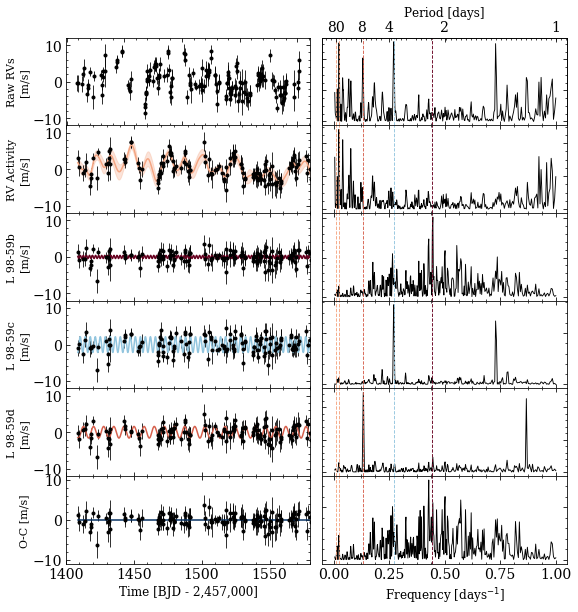

In [28]:
# plot components and GLSPs
Hlen = bjd.max()-bjd.min()
colH = 'k'
cols = ['#f4a582','#67001f','#92c5de','#d6604d','#053061','#4393c3','#2166ac','#053061']
t0 = 2457e3
Ps = [80,40,2.25,3.69,7.45]
colsV = ['#f4a582','#f4a582','#67001f','#92c5de','#d6604d']
fig = plt.figure(figsize=(8,8.3))
gs = gridspec.GridSpec(6,2)

# raw RVs
ax00 = plt.subplot(gs[0,0])
ax00.errorbar(bjd-t0, rv, erv, fmt='k.', elinewidth=.8)
ax00.set_ylabel('Raw RVs\n[m/s]', fontsize=11)
ax00.set_xticklabels('')
ax00.set_ylim((-12,12))
# GLSP
ax01 = plt.subplot(gs[0,1])
per,_,pwr = compute_LSperiodogram(bjd, rv, erv, plims=(1,Hlen))
ax01.plot(1./per, pwr, '-', c=colH, lw=.9)
#ax01.set_xscale('log'),
ax01.set_xlim((-.05,1.05))
ax01.set_yticklabels(''), ax01.set_xticklabels('')
for i in range(len(Ps)):
    ax01.axvline(1./Ps[i], ls='--', lw=.9, color=colsV[i])
    
# period axis
ax12 = ax01.twiny()
Pticks = np.sort([80,8,4,2,1])[::-1]
ax12.set_xticks(1./np.array(Pticks)), ax12.set_xticklabels(Pticks)
ax12.set_xlim(ax01.get_xlim())
ax12.set_xlabel('Period [days]', fontsize=12)

# RV activity
ax10 = plt.subplot(gs[1,0])
ax10.errorbar(bjd-t0, rv-V-kepb-kepc-kepd, erv, fmt='k.', elinewidth=.8)
ax10.fill_between(bjdM-t0, muM-sigM, muM+sigM, color=cols[0], alpha=.3)
ax10.plot(bjdM-t0, muM, '-', c=cols[0])
ax10.set_ylabel('RV Activity\n[m/s]', fontsize=11)
ax10.set_xticklabels('')
ax10.set_xlim((1400,1580))
ax10.set_ylim((-12,12))
# GLSP
ax11 = plt.subplot(gs[1,1])
per,_,pwr = compute_LSperiodogram(bjd, rv-V-kepb-kepc-kepd, erv, plims=(1,Hlen))
ax11.plot(1./per, pwr, '-', c=colH, lw=.9)
#ax11.set_xscale('log'), ax11.set_xlim((.5,2e2))
ax11.set_xlim((-.05,1.05))
ax11.set_yticklabels(''), ax11.set_xticklabels('')
for i in range(len(Ps)):
    ax11.axvline(1./Ps[i], ls='--', lw=.9, color=colsV[i])

# L 98-59b
ax20 = plt.subplot(gs[2,0])
ax20.errorbar(bjd-t0, rv-V-mu-kepc-kepd, erv, fmt='k.', elinewidth=.8)
ax20.plot(bjdM-t0, kepbM, '-', c=cols[1])
ax20.set_ylabel('L 98-59b\n[m/s]', fontsize=11)
ax20.set_xticklabels('')
ax20.set_xlim((1400,1580))
ax20.set_ylim((-12,12))
# GLSP
ax21 = plt.subplot(gs[2,1])
per,_,pwr = compute_LSperiodogram(bjd, rv-V-mu-kepc-kepd, erv, plims=(1,Hlen))
ax21.plot(1./per, pwr, '-', c=colH, lw=.9)
#ax21.set_xscale('log'), ax21.set_xlim((.5,2e2))
ax21.set_xlim((-.05,1.05))
ax21.set_yticklabels(''), ax21.set_xticklabels('')
for i in range(len(Ps)):
    ax21.axvline(1./Ps[i], ls='--', lw=.9, color=colsV[i])
    
# L 98-59c
ax30 = plt.subplot(gs[3,0])
ax30.errorbar(bjd-t0, rv-V-mu-kepb-kepd, erv, fmt='k.', elinewidth=.8)
ax30.plot(bjdM-t0, kepcM, '-', c=cols[2])
ax30.set_ylabel('L 98-59c\n[m/s]', fontsize=11)
ax30.set_xticklabels('')
ax30.set_xlim((1400,1580))
ax30.set_ylim((-12,12))
# GLSP
ax31 = plt.subplot(gs[3,1])
per,_,pwr = compute_LSperiodogram(bjd, rv-V-mu-kepb-kepd, erv, plims=(1,Hlen))
ax31.plot(1./per, pwr, '-', c=colH, lw=.9)
#ax31.set_xscale('log'), ax31.set_xlim((.5,2e2))
ax31.set_xlim((-.05,1.05))
ax31.set_yticklabels(''), ax31.set_xticklabels('')
for i in range(len(Ps)):
    ax31.axvline(1./Ps[i], ls='--', lw=.9, color=colsV[i])
    
# L 98-59d
ax40 = plt.subplot(gs[4,0])
ax40.errorbar(bjd-t0, rv-V-mu-kepb-kepc, erv, fmt='k.', elinewidth=.8)
ax40.plot(bjdM-t0, kepdM, '-', c=cols[3])
ax40.set_ylabel('L 98-59d\n[m/s]', fontsize=11)
ax40.set_xticklabels('')
ax40.set_xlim((1400,1580))
ax40.set_ylim((-12,12))
# GLSP
ax41 = plt.subplot(gs[4,1])
per,_,pwr = compute_LSperiodogram(bjd, rv-V-mu-kepb-kepc, erv, plims=(1,Hlen))
ax41.plot(1./per, pwr, '-', c=colH, lw=.9)
#ax41.set_xscale('log'), ax41.set_xlim((.5,2e2))
ax41.set_xlim((-.05,1.05))
ax41.set_yticklabels(''), ax41.set_xticklabels('')
for i in range(len(Ps)):
    ax41.axvline(1./Ps[i], ls='--', lw=.9, color=colsV[i])
    
# O-C
ax50 = plt.subplot(gs[5,0])
ax50.errorbar(bjd-t0, rv-V-mu-kepb-kepc-kepd, erv, fmt='k.', elinewidth=.8)
ax50.plot(bjdM-t0, kepdM*0, '-', c=cols[4])
ax50.set_ylabel('O-C [m/s]', fontsize=11)
ax50.set_xlim((1400,1580))
ax50.set_xlabel('Time [BJD - 2,457,000]', fontsize=12)
ax50.set_ylim((-11,11))
# GLSP
ax51 = plt.subplot(gs[5,1])
per,_,pwr = compute_LSperiodogram(bjd, rv-V-mu-kepb-kepc-kepd, erv, plims=(1,Hlen))
ax51.plot(1./per, pwr, '-', c=colH, lw=.9)
ax51.set_yticklabels('')
#ax51.set_xscale('log'), ax51.set_xlim((.5,2e2))
ax51.set_xlim((-.05,1.05))
#ax51.set_xticks(np.logspace(0,2,3)), ax51.set_xticklabels(['1','10','100'])
ax51.set_xlabel('Frequency [days$^{-1}$]', fontsize=12)
for i in range(len(Ps)):
    ax51.axvline(1./Ps[i], ls='--', lw=.9, color=colsV[i])
    
fig.subplots_adjust(wspace=.05, hspace=0, right=.98, top=.94, bottom=.06, left=.11)
plt.savefig('/Users/ryancloutier/Research/TOI_175/plots/RVcomponentsfreq.png')

# plot phase folded RVs

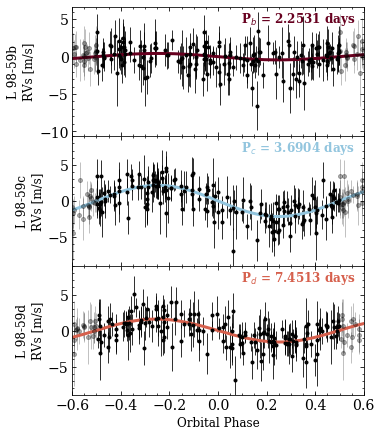

In [10]:
fig = plt.figure(figsize=(5,6))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

_,_,_,_,_,_,Pc,T0c,_,_,_,Pd,T0d,_,_,_,Pb,T0b,_,_,_ = results[0]
phaseb = foldAt(bjd, Pb, T0b)
phaseb[phaseb>.5] -= 1
phasebM = foldAt(bjdM, Pb, T0b)
phasebM[phasebM>.5] -= 1
phasec = foldAt(bjd, Pc, T0c)
phasec[phasec>.5] -= 1
phasecM = foldAt(bjdM, Pc, T0c)
phasecM[phasecM>.5] -= 1
phased = foldAt(bjd, Pd, T0d)
phased[phased>.5] -= 1
phasedM = foldAt(bjdM, Pd, T0d)
phasedM[phasedM>.5] -= 1

# L 98-59b
ax1.errorbar(phaseb, rv-V-mu-kepc-kepd, erv, fmt='k.', elinewidth=.8)
s = np.argsort(phasebM)
ax1.plot(phasebM[s], kepbM[s], '-', lw=3, c=cols[1])
g = phaseb > .4
ax1.errorbar(phaseb[g]-1, (rv-V-mu-kepc-kepd)[g], erv[g], fmt='ko', ms=4, elinewidth=.8, alpha=.3)
g = phasebM > .4
s = np.argsort(phasebM[g])
ax1.plot(phasebM[g][s]-1, kepbM[g][s], '-', lw=3, c=cols[1])
g = phaseb < -.4
ax1.errorbar(phaseb[g]+1, (rv-V-mu-kepc-kepd)[g], erv[g], fmt='ko', ms=4, elinewidth=.8, alpha=.3)
g = phasebM < -.4
s = np.argsort(phasebM[g])
ax1.plot(phasebM[g][s]+1, kepbM[g][s], '-', lw=3, c=cols[1])
ax1.set_xticklabels('')
ax1.set_ylabel('L 98-59b\nRVs [m/s]', fontsize=12)
ax1.set_xlim((-.6,.6))
ax1.text(.58, .88, 'P$_b$ = %.4f days'%Pb, weight='semibold', fontsize=12, transform=ax1.transAxes, color=cols[1])

# L 98-59c
ax2.errorbar(phasec, rv-V-mu-kepb-kepd, erv, fmt='k.', elinewidth=.8)
s = np.argsort(phasecM)
ax2.plot(phasecM[s], kepcM[s], '-', lw=3, c=cols[2])
g = phasec > .4
ax2.errorbar(phasec[g]-1, (rv-V-mu-kepb-kepd)[g], erv[g], fmt='ko', ms=4, elinewidth=.8, alpha=.3)
g = phasecM > .4
s = np.argsort(phasecM[g])
ax2.plot(phasecM[g][s]-1, kepcM[g][s], '-', lw=3, c=cols[2])
g = phasec < -.4
ax2.errorbar(phasec[g]+1, (rv-V-mu-kepb-kepd)[g], erv[g], fmt='ko', ms=4, elinewidth=.8, alpha=.3)
g = phasecM < -.4
s = np.argsort(phasecM[g])
ax2.plot(phasecM[g][s]+1, kepcM[g][s], '-', lw=3, c=cols[2])
ax2.set_xticklabels('')
ax2.set_ylabel('L 98-59c\nRVs [m/s]', fontsize=12)
ax2.set_xlim((-.6,.6)), ax2.set_ylim((-9,9))
ax2.text(.58, .88, 'P$_c$ = %.4f days'%Pc, weight='semibold', fontsize=12, transform=ax2.transAxes, color=cols[2])

# L 98-59d
ax3.errorbar(phased, rv-V-mu-kepc-kepb, erv, fmt='k.', elinewidth=.8)
s = np.argsort(phasedM)
ax3.plot(phasedM[s], kepdM[s], '-', lw=3, c=cols[3])
g = phased > .4
ax3.errorbar(phased[g]-1, (rv-V-mu-kepb-kepc)[g], erv[g], fmt='ko', ms=4, elinewidth=.8, alpha=.3)
g = phasedM > .4
s = np.argsort(phasedM[g])
ax3.plot(phasedM[g][s]-1, kepdM[g][s], '-', lw=3, c=cols[3])
g = phased < -.4
ax3.errorbar(phased[g]+1, (rv-V-mu-kepb-kepc)[g], erv[g], fmt='ko', ms=4, elinewidth=.8, alpha=.3)
g = phasedM < -.4
s = np.argsort(phasedM[g])
ax3.plot(phasedM[g][s]+1, kepdM[g][s], '-', lw=3, c=cols[3])
ax3.set_xlabel('Orbital Phase', fontsize=12)
ax3.set_ylabel('L 98-59d\nRVs [m/s]', fontsize=12)
ax3.set_xlim((-.6,.6)), ax3.set_ylim((-9,9))
ax3.text(.58, .88, 'P$_d$ = %.4f days'%Pd, weight='semibold', fontsize=12, transform=ax3.transAxes, color=cols[3])

fig.subplots_adjust(bottom=.08, left=.16, right=.97, top=.98, hspace=0)
plt.savefig('/Users/ryancloutier/Research/TOI_175/plots/RVphased.png')